In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="llama-3.3-70b-versatile",
    temperature=0.7
)
# llm.invoke("Tell me a joke")

In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [4]:
#the output state of the LLM
class LLMState(TypedDict):
    question:str
    answer:str

#another node for QnA

def llm_qna(state: LLMState) -> LLMState:
    # Process the question and generate an answer
    question = state["question"]

    prompt=f"Answer the following question: {question}"

    state["answer"] = llm.invoke(prompt).content

    return state


In [7]:
graph=StateGraph(LLMState)
graph.add_node("llm_qna", llm_qna)

graph.add_edge(START, "llm_qna")
graph.add_edge("llm_qna", END)

workflow=graph.compile()

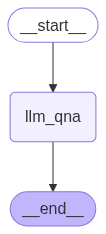

In [8]:
workflow

In [9]:
initial_state={"question": "What is the capital of France?"}
final_state=workflow.invoke(initial_state)

In [10]:
final_state

{'question': 'What is the capital of France?',
 'answer': 'The capital of France is Paris.'}